

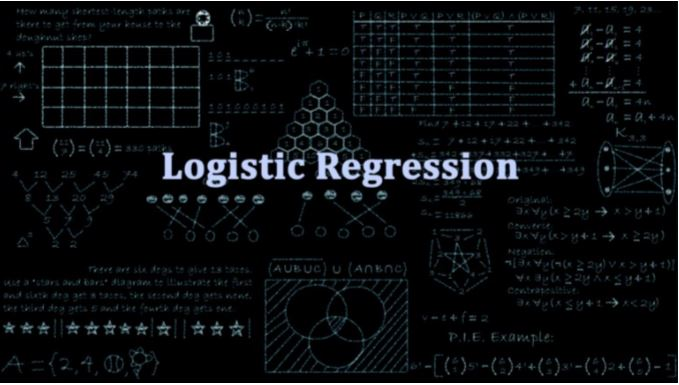

## Data 
This dataset comes from Super Data Sciennce, and it is about a bank that is lossing customers
at an alarming rate. Originally, the said bank operates in Germani, Spain and France but some adjustments have been made
Due to the fact that most of my audience are likely to come from Ghana, I decided to changed the Geography variables to Accra,
Kumasi and Bolga respectively. To download the dataset, click on this link and navigate to section 5

## Input Variables

1. RowNumber: numeric
2. Customerid : String
3. Surename : String
4. CreditScore: Numeric
5. Geography: Where that brach of the bank is located (categorical: "Accra","Kumasi","Bolga")
6. Gender: (Categorical: "Male","Female")
7. Age: Numeric
8. Tenure: How long the cuttomer stayed in the bank (Numeric)
9. Balance: How much amount the customer still have in their account (Numeric)
10. NumOfProducts: Number of products the customer has with the bank e.g mastercard, ezwitch etc
11. HasCrCard: Does the customer have a credit card?( Binary: "yes", "no")
12. IsActiveMember: Is the customer an active member of the bank? (Categorical: "yes", "no")
13. EstimatedSalary: Numeric
14. Exited: Has the customer exited from the bank? (categorical: "yes","no")

In [88]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [89]:
train=pd.read_csv("Churn_Train.csv")

In [90]:
train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,Bolga,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Accra,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,Bolga,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,Bolga,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Accra,Female,43,2,125510.82,1,1,1,79084.10,0


# Exploratory Data Analysis

### Let's visualize the existence of null values

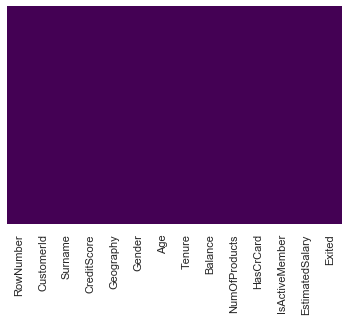

In [91]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")

### From the above visulization, it is clear that our dataset does not have missing values. 

### we want to also have a basic overview of the number of people who have exited the bank versus the number that is still with the bank

In [92]:
sns.set_style("whitegrid")

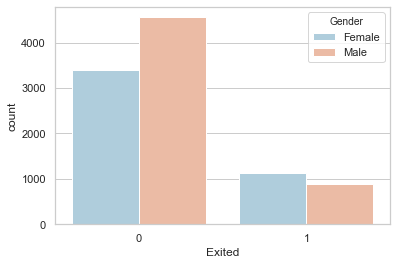

In [93]:
sns.countplot(x="Exited",hue="Gender",data=train, palette="RdBu_r")

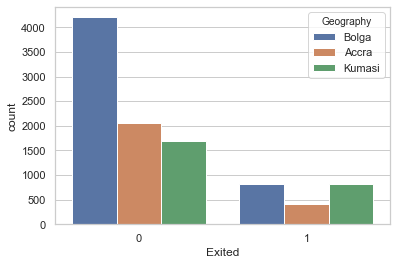

In [94]:
sns.countplot(x="Exited",hue="Geography",data=train)

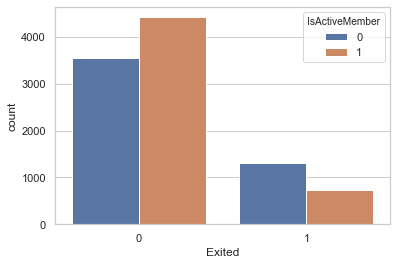

In [95]:
sns.countplot(x="Exited",hue="IsActiveMember",data=train)

### Let's visualize our data to see the distribution of ages

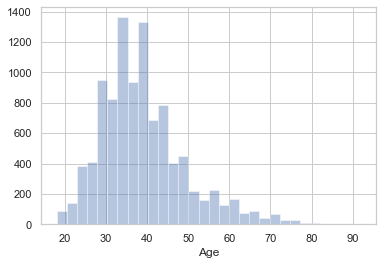

In [96]:
sns.distplot(train["Age"],kde=False,bins=30)

### most of the cutomers of this bank are between age 28 and 50

In [97]:
train.info

<bound method DataFrame.info of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619     Bolga  Female   42   
1             2    15647311       Hill          608     Accra  Female   41   
2             3    15619304       Onio          502     Bolga  Female   42   
3             4    15701354       Boni          699     Bolga  Female   39   
4             5    15737888   Mitchell          850     Accra  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771     Bolga    Male   39   
9996       9997    15569892  Johnstone          516     Bolga    Male   35   
9997       9998    15584532        Liu          709     Bolga  Female   36   
9998       9999    15682355  Sabbatini          772    Kumasi    Male   42   
9999      10000    15628319     Walker          792     Bolga  Female   28   

      Tenure    Balance  NumOfP

### The logistic regression algorithm is not good at processing text. we will have to introduce dummy variables to replace our text varibles. 

In [98]:
gender=pd.get_dummies(train["Gender"],drop_first=True)

In [99]:
geography=pd.get_dummies(train["Geography"],drop_first=True)


In [100]:
train=pd.concat([train,gender,geography],axis=1)

In [101]:
train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Bolga,Kumasi
0,1,15634602,Hargrave,619,Bolga,Female,42,2,0.00,1,1,1,101348.88,1,0,1,0
1,2,15647311,Hill,608,Accra,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,0
2,3,15619304,Onio,502,Bolga,Female,42,8,159660.80,3,1,0,113931.57,1,0,1,0
3,4,15701354,Boni,699,Bolga,Female,39,1,0.00,2,0,0,93826.63,0,0,1,0
4,5,15737888,Mitchell,850,Accra,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,0


want to do away with columns that will not be helpful

In [102]:
train.drop(["Geography"],axis=1,inplace=True)

In [103]:
train.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Bolga,Kumasi
0,1,15634602,Hargrave,619,Female,42,2,0.00,1,1,1,101348.88,1,0,1,0
1,2,15647311,Hill,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,0
2,3,15619304,Onio,502,Female,42,8,159660.80,3,1,0,113931.57,1,0,1,0
3,4,15701354,Boni,699,Female,39,1,0.00,2,0,0,93826.63,0,0,1,0
4,5,15737888,Mitchell,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,0


In [104]:
train.drop(["Gender"],axis=1,inplace=True)

In [105]:
train.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Bolga,Kumasi
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,1,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,0,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,1,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,1,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,0,0


In [106]:
train.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

In [107]:
train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Bolga,Kumasi
0,619,42,2,0.00,1,1,1,101348.88,1,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,0


In [108]:
train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Bolga,Kumasi
0,619,42,2,0.00,1,1,1,101348.88,1,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,0


In [109]:
X=train.drop("Exited",axis=1)
y=train["Exited"]

In [110]:
#from sklearn.cross_validation import train_test_split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [112]:
from sklearn.linear_model import LogisticRegression


In [113]:
logmodel=LogisticRegression()


In [114]:
logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [115]:
predictions=logmodel.predict(X_test)

In [116]:
from sklearn.metrics import classification_report

In [117]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2657
           1       0.43      0.09      0.15       643

    accuracy                           0.80      3300
   macro avg       0.62      0.53      0.52      3300
weighted avg       0.74      0.80      0.74      3300



In [118]:
from sklearn.metrics import confusion_matrix

In [119]:
confusion_matrix(y_test,predictions)

array([[2578,   79],
       [ 583,   60]], dtype=int64)